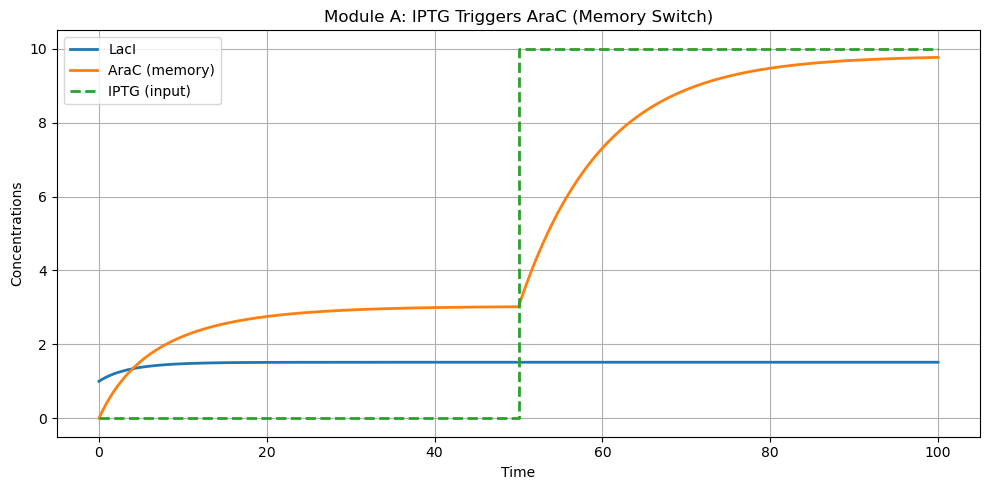

In [6]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt 

model = te.loada ("""
model ModuleA_IPTG_Memory
                  
// Species
LacI = 1;
IPTG = 0;
AraC = 0;
                
// Parameters
k_lacI = 0.5 // LacI production
k_deg_lacI = 0.1 // LacI degradation
k_araC = 1.0 // AraC production
k_deg_araC = 0.1 // Arac degradation
k_IPTG = 1.0 // IPTG inhibition constant
n = 2 // hill coefficient
                  
// Reactions
J1: -> LacI; k_lacI/(1+LacI^2)
J2: LacI -> ; k_deg_lacI*LacI
J3: -> AraC; k_araC*(1/(1+(LacI/(1+IPTG/k_IPTG))^n))
J4: AraC -> ; k_deg_araC*AraC

end
""")

model.IPTG = 0
r1 = model.simulate(0, 50, 500)

model.IPTG = 10
r2 = model.simulate(50, 100, 500)

r_combined = np.vstack((r1, r2))

time = r_combined[:,0]
iptg_input = np.array([0]*len(r1)+[10]*len(r2))

plt.figure(figsize=(10,5))
plt.plot(time, r_combined[:,1], label='LacI', linewidth = 2)
plt.plot(time, r_combined[:,2], label='AraC (memory)', linewidth=2)
plt.plot(time, iptg_input, '--', label='IPTG (input)', linewidth = 2)

plt.title("Module A: IPTG Triggers AraC (Memory Switch)")
plt.xlabel("Time")
plt.ylabel("Concentrations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()